In [5]:
# class inheritance: process of inheriting behavior and appearance from existing class
# inherit appearance(attributes), behavior(methods)
# class Fish(Animal):
#     def __init__(self):
#         super().__init__() # super refers to the super class

class Animal:
    def __init__(self):
        self.num_eyes = 2

    def breath(self):
        print("Inhale, exhale.")

class Fish:
    def swim(self):
        print("moving in water.")

nemo = Fish()
nemo.swim()

moving in water.


In [13]:
# inherit Animal class to fish class
class Animal:
    def __init__(self):
        self.num_eyes = 2

    def breathe(self):
        print("Inhale, exhale.")

class Fish(Animal):
    def __init__(self):
        super().__init__() #it means inheriting all of attributes and methods in super class

    def breathe(self):
        super().breathe()
        print("doing this unberwater.")
    
    def swim(self):
        print("moving in water.")

nemo = Fish()
nemo.swim()
nemo.breathe()
print(nemo.num_eyes)

moving in water.
Inhale, exhale.
doing this unberwater.
2


In [17]:
class Dog:
    def __init__(self):
        self.temperament = "loyal"

class Labrador(Dog):
    def __init__(self):
        super().__init__()
        self.temperament = "gentle"
        
doggo = Dog()
print(f"A dog is {doggo.temperament}")

sparky = Labrador()
print(f"Sparky is {sparky.temperament}")

A dog is loyal
Sparky is gentle


In [18]:
class Dog:
    def __init__(self):
        self.temperament = "loyal"

class Labrador(Dog):
    def __init__(self):
        self.temperament = "gentle"
        super().__init__() #선언하는 순서가 중요하다!!!
                
doggo = Dog()
print(f"A dog is {doggo.temperament}")

sparky = Labrador()
print(f"Sparky is {sparky.temperament}")

A dog is loyal
Sparky is loyal


In [24]:
# sclcing
# list[2:5]
piano_keys = ["a","b","c","d","e","f","g"]
print(piano_keys[2:5])
print(piano_keys[:5])
print(piano_keys[2:5:2])
print(piano_keys[::2]) #step
# we can use same methods for tuples

['c', 'd', 'e']
['a', 'b', 'c', 'd', 'e']
['c', 'e']
['a', 'c', 'e', 'g']


In [ ]:
# final_main.py
import time
from turtle import Screen, Turtle
from snake import Snake
from food import Food
from scoreboard import Scoreboard

# screen setup
screen = Screen()
screen.setup(width=600, height=600)
screen.bgcolor("black")
screen.title("My snake Game")
screen.tracer(0)

# Part1. Create a snake body

# Part2. Move the snake
snake = Snake()

food = Food()

scoreboard = Scoreboard()

# Park3. Control the snake
screen.listen()
screen.onkey(snake.up, "Up")
screen.onkey(snake.down, "Down")
screen.onkey(snake.left, "Left")
screen.onkey(snake.right, "Right")

game_is_on = True
while game_is_on:
    screen.update()
    time.sleep(0.1)
    snake.move()
    # Part4. Detech collision with food
    if snake.head.distance(food) < 15:  # get error when snake.head().distance(food)!!!
        food.refresh()
        snake.extend()
        # Part5. Create a scoreboard
        scoreboard.increase_score()

    # Part6. Detech collision with wall
    if snake.head.xcor() > 290 or snake.head.xcor() <-290 or snake.head.ycor() > 290 or snake.head.ycor() < -290:
        game_is_on = False
        scoreboard.game_over()

    # Part7. Detech collision with tail
    for segment in snake.segments[1:]:
        if snake.head.distance(segment) < 10 :
            game_is_on = False
            scoreboard.game_over()


screen.exitonclick()

In [ ]:
# snake.py
from turtle import Turtle
STARTING_POSITION = [(0, 0), (-20, 0), (-40, 0)]  # used tuples
MOVE_DISTANCE = 20
# snake can't move reverse direction(180 degree)
UP = 90
DOWN = 270
LEFT = 180
RIGHT = 0


class Snake:
    def __init__(self):
        self.segments = []
        self.create_snake()
        self.head = self.segments[0]

    def create_snake(self):
        for position in STARTING_POSITION:
            self.add_segment(position)

    def add_segment(self, position):
        new_segment = Turtle("square")
        new_segment.color("white")
        new_segment.penup()
        new_segment.goto(position)
        self.segments.append(new_segment)


    def extend(self): # add a new segment to the snake
        self.add_segment(self.segments[-1].position())


    def move(self):
        for seg_num in range(len(self.segments)-1, 0, -1):
            new_x = self.segments[seg_num - 1].xcor()
            new_y = self.segments[seg_num - 1].ycor()
            self.segments[seg_num].goto(new_x, new_y)
        self.head.forward(MOVE_DISTANCE)

    def up(self):
        if self.head.heading() != DOWN:
            self.head.setheading(UP)
        # self.move() _ it doesn't need

    def down(self):
        if self.head.heading() != UP:
            self.head.setheading(DOWN)

    def right(self):
        if self.head.heading() != LEFT:
            self.head.setheading(RIGHT)

    def left(self):
        if self.head.heading() != RIGHT:
            self.head.setheading(LEFT)

In [ ]:
# food.py
from turtle import Turtle
import random

class Food(Turtle):
    # food generated at random location when eaten
    def __init__(self):
        super().__init__()
        self.shape("circle")
        self.penup()
        self.shapesize(stretch_len=0.5, stretch_wid=0.5)
        self.color("blue")
        self.speed("fastest")
        random_x = random.randint(a=-280,b=280)
        random_y = random.randint(a=-280,b=280)
        self.goto(random_x, random_y)

    def refresh(self):
        random_x = random.randint(-280, 280)
        random_y = random.randint(-280, 280)
        self.goto(random_x, random_y)

In [ ]:
# scoreboard.py
from turtle import Turtle
ALIGNMENT = "center"
FONT = ("Courier", 12, "normal")

class Scoreboard(Turtle):
    def __init__(self):
        super().__init__()
        self.goto(0, 280)
        self.hideturtle()
        self.color("white")
        self.score = 0
        self.update_scorebaord()
    def update_scorebaord(self):
        self.write(f"Score: {self.score}", move=False, align=ALIGNMENT, font=FONT)

    def increase_score(self):
        self.score += 1
        self.clear()
        self.update_scorebaord()

    def game_over(self):
        self.goto(0, 0)
        self.write("GAME OVER", align=ALIGNMENT, font=FONT)

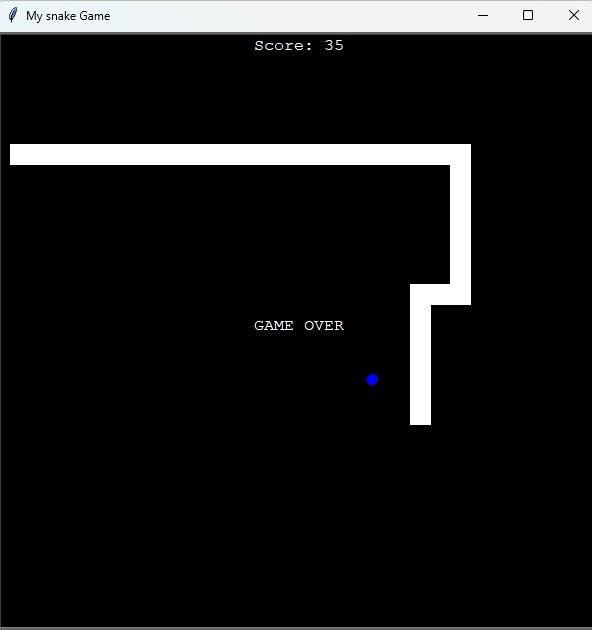

In [25]:
# Draw a random walk_img
from PIL import Image
from IPython.display import display
img = Image.open('snake_game.jpg')
display(img)